# OpenCV basics

In this notebook we will cover :
* loading imaged
* changing color maps
* HSV color scheme
* saving files

In [ ]:
# opencv_python is imported as "cv2".  The 2 refers to that this code is derived from the C++ parent (cv is derived from a C parent).  The version is probably OpenCV 4 
import cv2

import os
import numpy as np

# Although opencv has its own draw code, this opens in a new window.  For Python Notebooks, I prefer to use matplotlib's imshow function
import matplotlib.pyplot as plt

Note: CV and CV2 are the API versions (not reference to the version of OpenCV).  CV is the original C code version, whereas CV2 is the C++ version.

In [13]:
# Read an image in using openCV
cathedral_image = cv2.imread(os.path.relpath('../../Data/Pitt_Cathedral.jpg'))

# The function imread
# retval = cv2.imread( filename[, flags] )
# flags:
#    cv2.IMREAD_GRAYSCALE or 0: Loads image in grayscale mode
#    cv2.IMREAD_COLOR or 1: Loads a color image. Any transparency of image will be neglected. It is the default flag.
#    cv2.IMREAD_UNCHANGED or -1: Loads image as such including alpha channel.


Image Credits:
<a href="https://commons.wikimedia.org/wiki/File:CathedralFromSS.jpg">Link</a>
Credit: Michael G. White
Copyright: © 2007 Michael G. White

In [14]:
# print the size  of image
print("Image size (H, W) is:", cathedral_image.shape)

# print data-type of image
print("Data type of image is:", cathedral_image.dtype)

Image size (H, W) is: (768, 1024, 3)
Data type of image is: uint8


Text(0.5, 1.0, 'These colors are wrong')

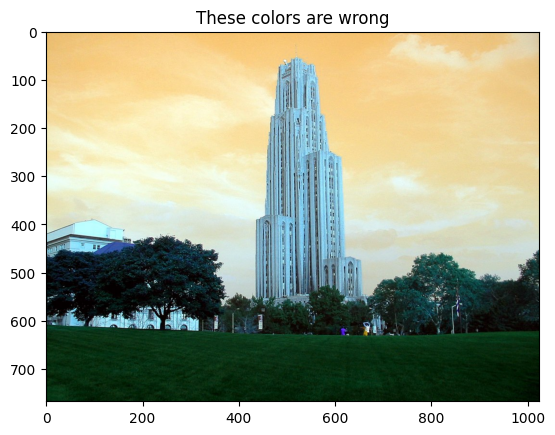

In [ ]:
# Use the matlibplot function matplotlib.pyplot.imshow to draw in Notebooks.  The cv2.imshow function will make a new window, which sometimes crashes Jupyter

plt.imshow(cathedral_image)
plt.title("These colors are wrong")

### Converting colors BGR to RBG
openCV uses BGR format for the order of the color channels.  Matlab (matplotlib) uses RGB, so the colors are in the reverse order if we just use the imshow function.

Text(0.5, 1.0, 'These colors are correct in RGB order')

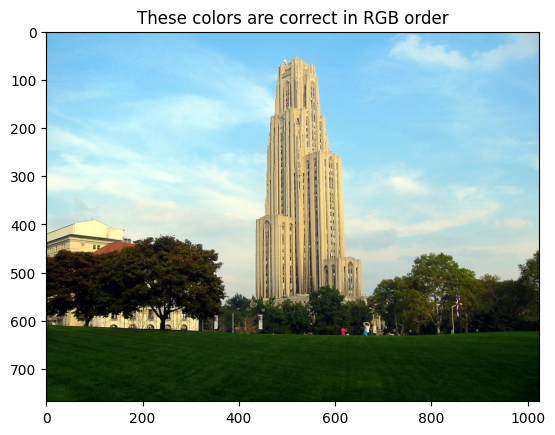

In [16]:
# We have to reverse the color order to get from BGR to RGB
cathedral_image_rgb=cathedral_image[:,:,::-1]
plt.imshow(cathedral_image_rgb)
plt.title("These colors are correct in RGB order")

### Using the split command

Text(0.5, 1.0, 'Merged Output')

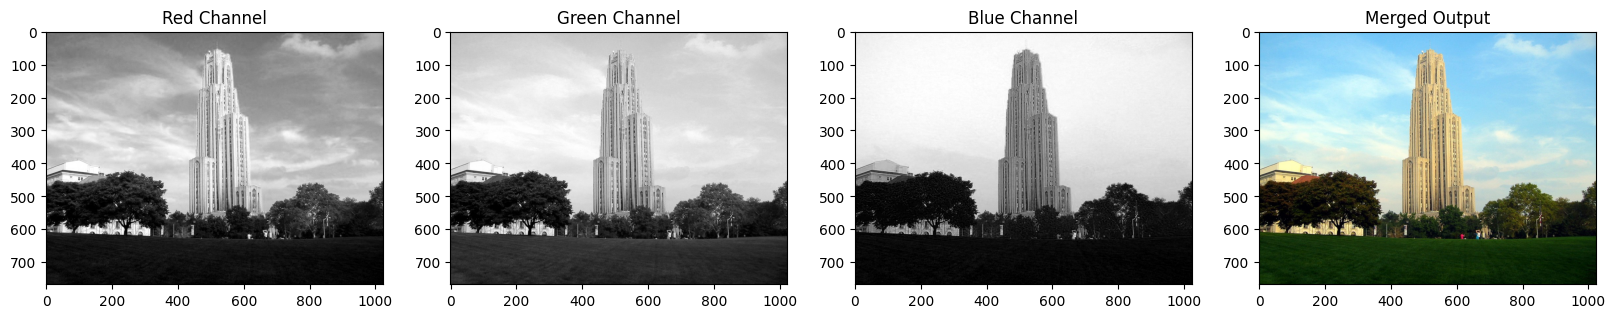

In [17]:
# Split the image into the B,G,R components
b, g, r = cv2.split(cathedral_image)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel")

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((r,g,b))
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged)
plt.title("Merged Output")

### Or using the cvtColor command
We can also use the cvtColor command to convert the color scheme
see color code options at 
<a href="https://docs.opencv.org/4.5.1/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0">documentation</a>

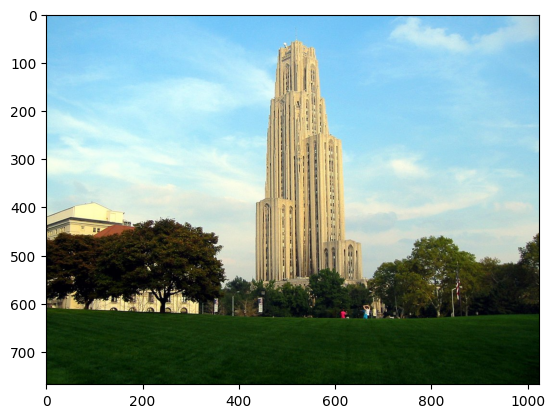

In [18]:
cathedral_image_rgb = cv2.cvtColor(cathedral_image, cv2.COLOR_BGR2RGB)
plt.imshow(cathedral_image_rgb)

## HSV Color

HSV can be thought of as a radial space, whereas RGB is a cartisean space 
* Hue - The "angle".  Imagine the colorwheel.
* Saturation- the "radius". The center will be white and the edge the deepest of that color
* Value - the "height".  0 is black/darker version of that color 

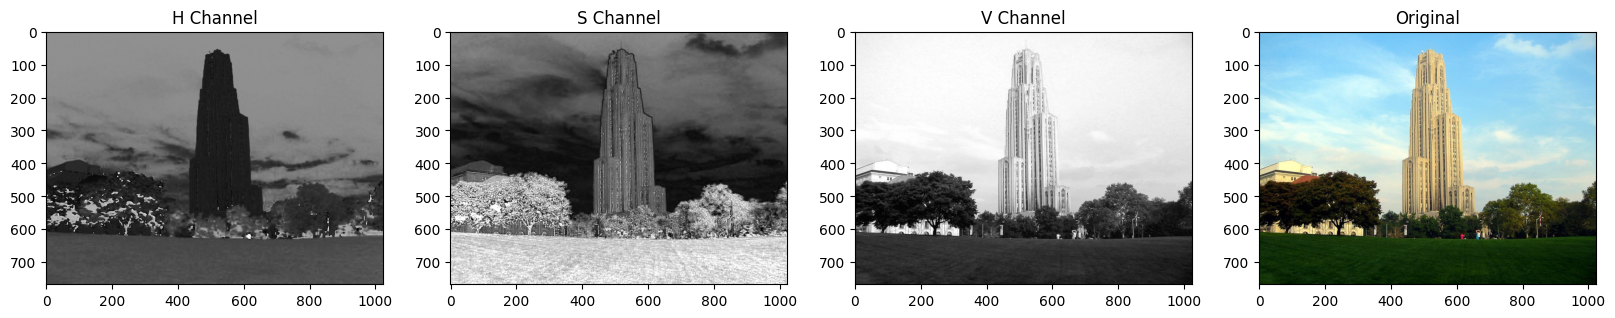

In [19]:
img_hsv = cv2.cvtColor(cathedral_image, cv2.COLOR_BGR2HSV)

# Split the image into the B,G,R components
h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(cathedral_image_rgb);   plt.title("Original");

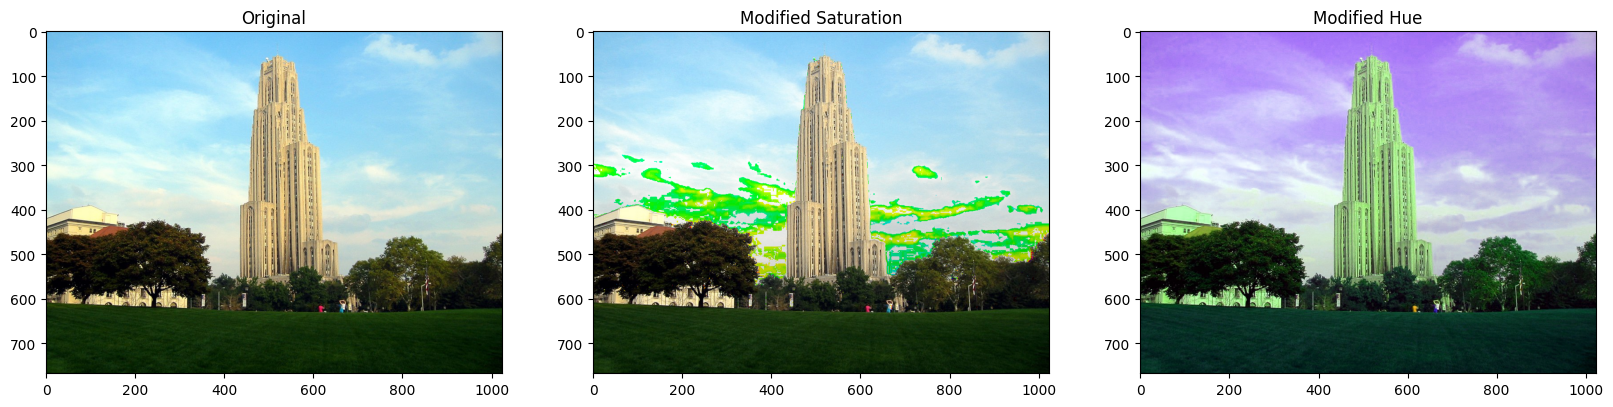

In [20]:
# We can edit the values.  Playing with the hue to shift all the colors
h_new = h + 30
mod_merged_hsv = cv2.merge((h_new, s, v))
mod_rgb = cv2.cvtColor(mod_merged_hsv, cv2.COLOR_HSV2RGB)
# We need to convert to rgb for matlab.plot to work

s_new = s -20
mod_merged_hsv2 = cv2.merge((h, s_new, v))
mod_rgb2 = cv2.cvtColor(mod_merged_hsv2, cv2.COLOR_HSV2RGB)
# We need to convert to rgb for matlab.plot to work

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(131);plt.imshow(cathedral_image_rgb);   plt.title("Original");
plt.subplot(132);plt.imshow(mod_rgb2);   plt.title("Modified Saturation");
plt.subplot(133);plt.imshow(mod_rgb);   plt.title("Modified Hue");

# Note the saturation is showing clipping

## Saving file
Use the imwrite function to write the image to disk 
See <a href="https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac">documentation</a>

In [21]:
# save the image
cv2.imwrite("cathedral_image_(RBG).png", cathedral_image_rgb)

True

In [ ]:
# I don't want to clutter in my github repo, so delete the file we just made.  
os.remove("cathedral_image_(RBG).png")